https://youtube.com/shorts/25MyRpZleuk?feature=shared

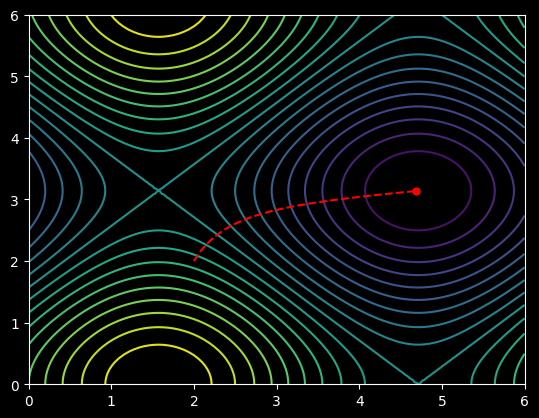

In [4]:
#Autor: Daniel Arteaga
#Página: Faster Academy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Función objetivo con múltiples mínimos y máximos
def f(x, y):
    return np.sin(x) + np.cos(y)

# Gradiente de la función objetivo
def grad_f(x, y):
    return [np.cos(x), -np.sin(y)]

# Tasa de aprendizaje
learning_rate = 0.03

# Inicialización aleatoria de los parámetros
x_init = 2
y_init = 2
frames = 200

# Gradiente descendente
def gradient_descent(x, y, num_iterations):
    x_vals = [x]
    y_vals = [y]
    for i in range(num_iterations):
        gradient = grad_f(x, y)
        x -= learning_rate * gradient[0]
        y -= learning_rate * gradient[1]
        x_vals.append(x)
        y_vals.append(y)
    return x_vals, y_vals

# Run gradient descent once to get the trajectory
x_vals, y_vals = gradient_descent(x_init, y_init, frames)


# Crear la figura
fig, ax = plt.subplots()
plt.style.use('dark_background')
# Rango de los ejes
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Graficar la función objetivo
ax.contour(X, Y, Z, levels=20)

# Inicializar el punto de inicio
point, = ax.plot([], [], 'ro', markersize=5)

# Inicializar la línea
line, = ax.plot([], [],  'r--')

# Función de inicialización
def init():
    point.set_data([], [])
    line.set_data([], [])
    return point, line

# Función de actualización de la animación
def update(frame):
    point.set_data([x_vals[frame]], [y_vals[frame]]) # Pass as lists
    line.set_data(x_vals[:frame+1], y_vals[:frame+1])
    return point, line

interval = 50
# Crear la animación
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True,interval=interval)

# Guardar la animación en formato GIF
ani.save('gradient_descent_2d_line_v2.gif', writer='imagemagick')

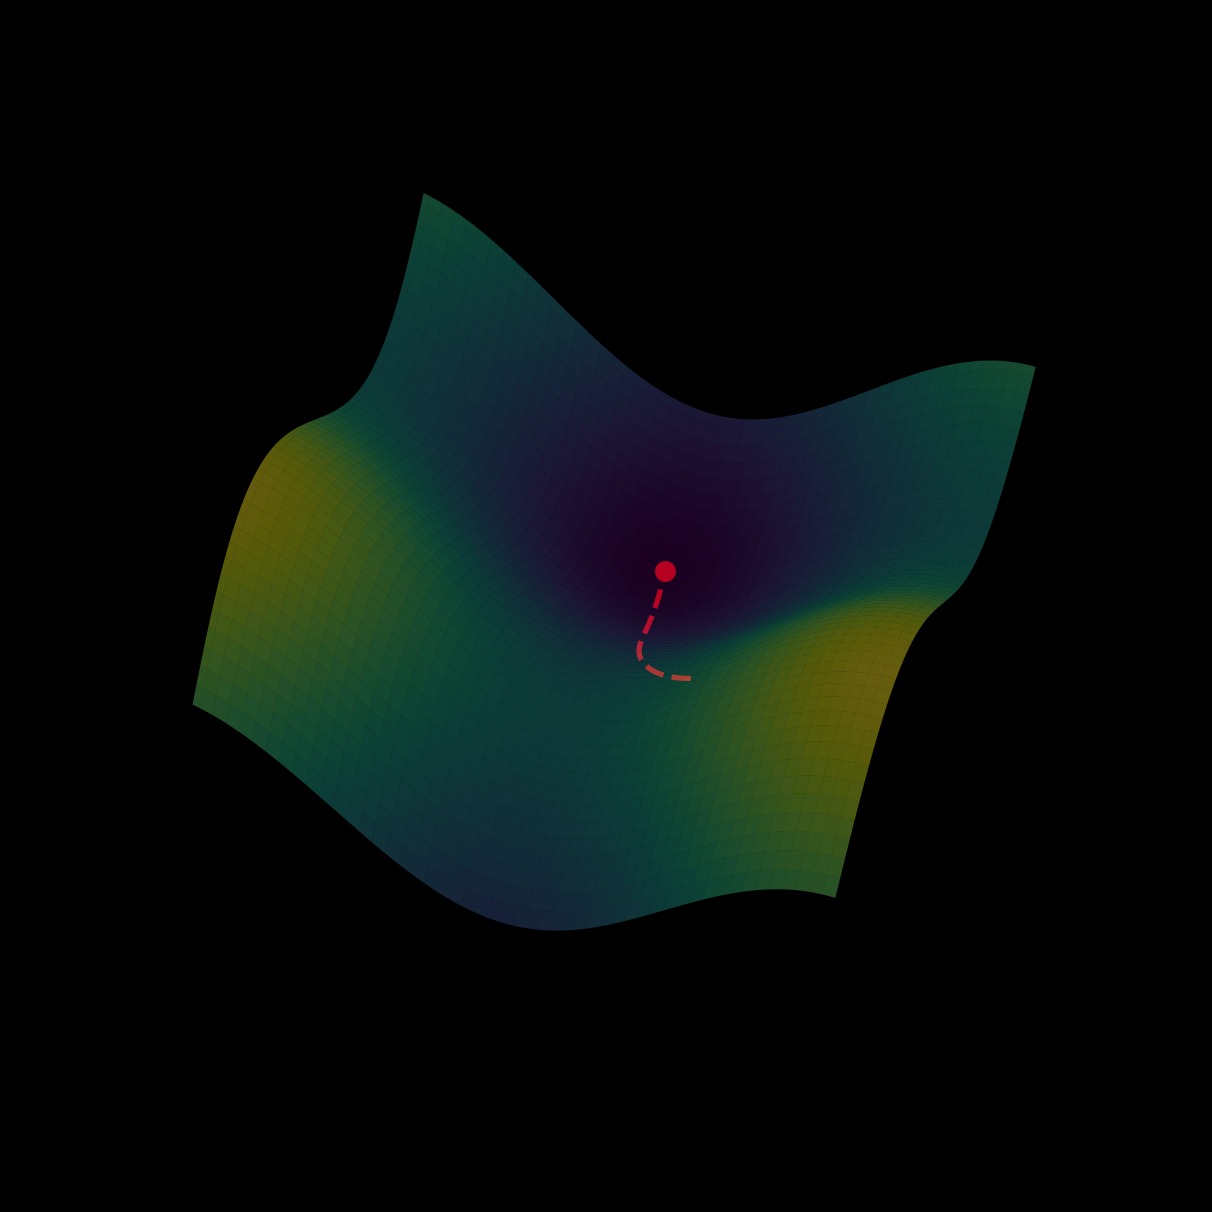

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Función objetivo con múltiples mínimos y máximos
def f(x, y):
    return np.sin(x) + np.cos(y)

# Gradiente de la función objetivo
def grad_f(x, y):
    return [np.cos(x), -np.sin(y)]

# Tasa de aprendizaje
learning_rate = 0.03

# Inicialización aleatoria de los parámetros
x_init = 2
y_init = 2
frames = 200

# Gradiente descendente
def gradient_descent(x, y,frames):
    x_vals = [x]
    y_vals = [y]
    for i in range(frames):
        gradient = grad_f(x, y)
        x -= learning_rate * gradient[0]
        y -= learning_rate * gradient[1]
        x_vals.append(x)
        y_vals.append(y)
    return x_vals, y_vals

# Run gradient descent once to get the trajectory
x_vals, y_vals = gradient_descent(x_init, y_init, frames)

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(6, 8), dpi=250)
ax = fig.add_subplot(111, projection='3d')
plt.style.use('dark_background')
ax.set_axis_off()


# Rango de los ejes
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Graficar la función objetivo en 3D con transparencia y un zorder bajo
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4, zorder=0)

# Inicializar el punto de inicio con color rojo y tamaño de 5, y un zorder alto
point, = ax.plot([x_init], [y_init], [f(x_init, y_init)], 'ro', markersize=5, zorder=1)

# Inicializar la línea con color rojo discontinua y un zorder alto
line, = ax.plot([], [], [], 'r--', zorder=2)

# Función de inicialización
def init():
    point.set_data([], [])
    point.set_3d_properties([])
    line.set_data([], [])
    line.set_3d_properties([])
    return point, line

# Función de actualización de la animación
def update(frame):
    point.set_data([x_vals[frame]], [y_vals[frame]])
    point.set_3d_properties([f(x_vals[frame], y_vals[frame])])
    line.set_data(x_vals[:frame+1], y_vals[:frame+1])
    line.set_3d_properties(f(np.array(x_vals[:frame+1]), np.array(y_vals[:frame+1])))
    ax.view_init(elev=60, azim=frame)  # Girar la vista. puedes comentar esto si no quieres que la grafica gire.
    return point, line

# Ajustar el número de fotogramas y el intervalo para obtener una animación más larga
interval = 50

# Crear la animación
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=interval)

# Guardar la animación en formato GIF
ani.save('gradient_descent_3d_color_v2.gif', writer='pillow')